In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
file_name = "H:\Selected-2 project\SVHN_single_grey1.h5"

# To create an HDF5 file object
df = h5py.File(file_name, 'r')

# To see what is in dataset
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [3]:
data = np.array(df)

test_x = np.array(df['X_test'])
train_x = np.array(df['X_train'])
val_x = np.array(df['X_val'])

test_y = np.array(df['y_test'])
train_y = np.array(df['y_train'])
val_y = np.array(df['y_val'])

In [4]:
""" 
?Checking type of converted array
"""
print(type(test_x))
print(type(train_x))
print(type(val_x))
print(type(test_y))
print(type(train_y))
print(type(val_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:

print(len(test_x))
print(len(train_x))
print(len(val_x))
print(len(test_y))
print(len(train_y))
print(len(val_y))

18000
42000
60000
18000
42000
60000


In [6]:
# Further split the training set into training and validation sets
X_test_new, X_val_new, y_test_new, y_val_new = train_test_split(test_x, test_y, test_size=0.5, random_state=42)

# X_train_new and y_train_new will be used for training the model
# X_val and y_val will be used for evaluating the model's performance during training

In [7]:
print(len(X_test_new))
print(len(X_val_new))
print(len(train_x))
print(len(y_test_new))
print(len(y_val_new))
print(len(train_y))

9000
9000
42000
9000
9000
42000


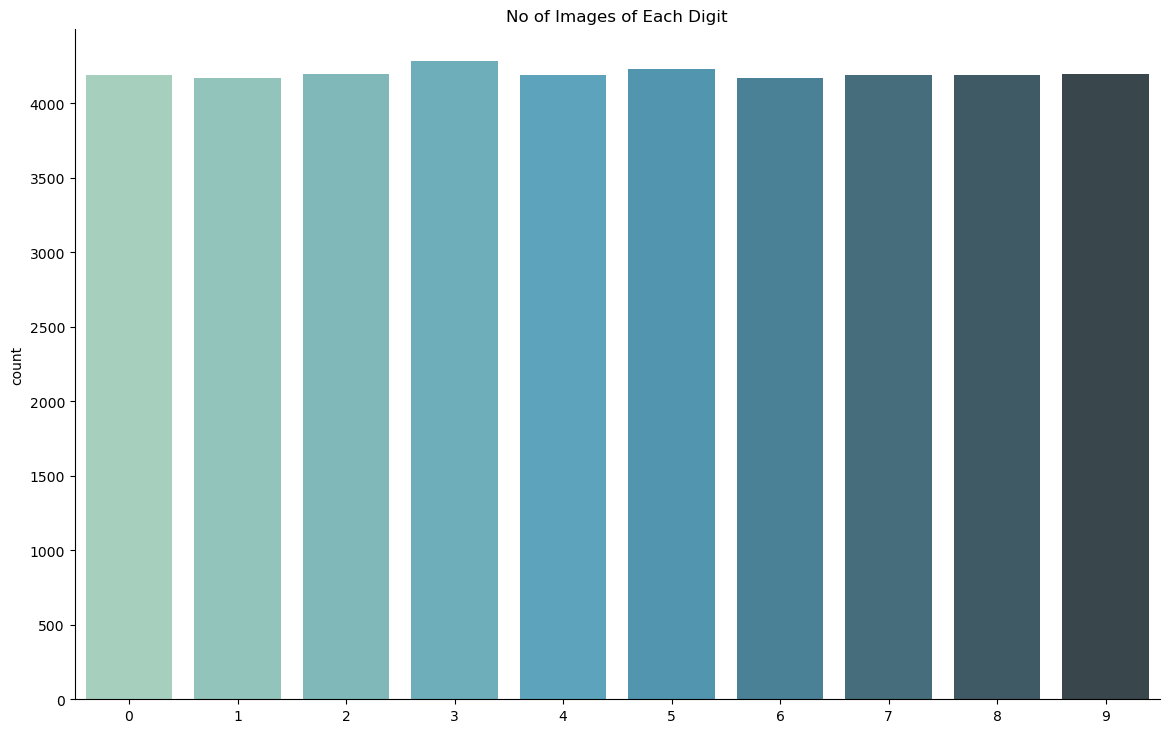

In [8]:
""" 
TODO: Dataset visualization
? To create a figure and a set of subplots
? To show the counts of observations in each class using bars
? To remove spines from top and right
"""

f, ax = plt.subplots(figsize=(14, 8.7))


ax = sns.countplot(x=train_y, palette="GnBu_d")


sns.despine()

plt.title("No of Images of Each Digit")
plt.show()

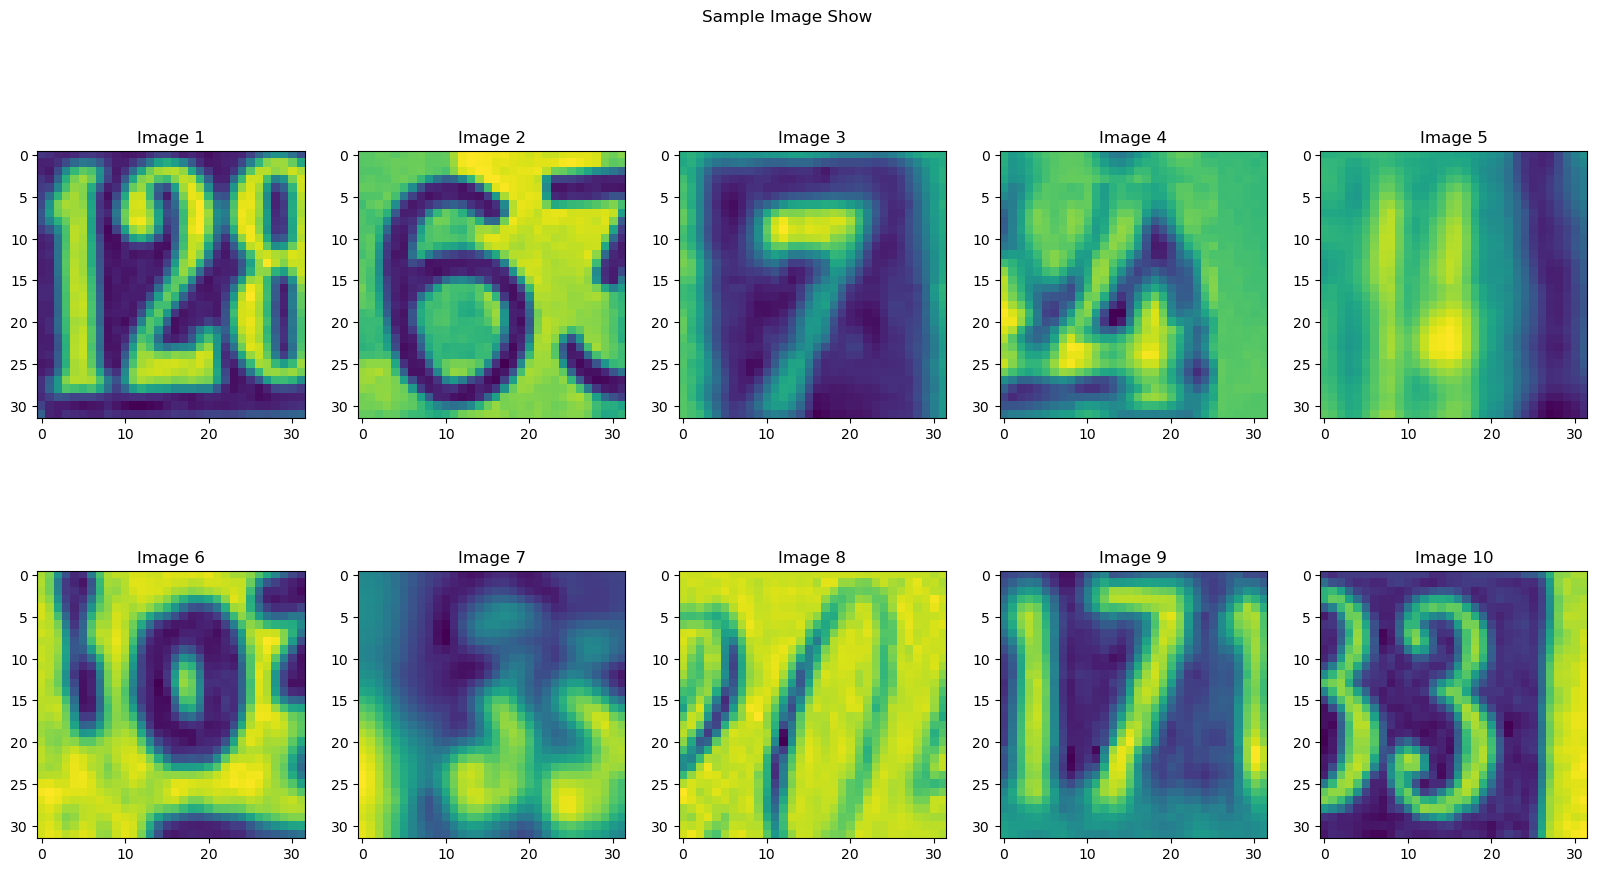

In [9]:
"""
TODO: Random Sample Of Image Visualization
  
"""
count = 1
plt.figure(figsize=[20, 10])
# To Add a centered suptitle
plt.suptitle("Sample Image Show")
for i in range(10):
    plt.subplot(2, 5, count) # To add or retrive axes
    plt.imshow(train_x[i])
    plt.title("Image %s" % count)
    count += 1
    
plt.show()

In [10]:
"""
TODO: Preprocessing 
? Checking Lowest and Highest Pixel Value
"""
print("Lowest Pixel Value:", train_x[0].min())
print("Highest Pixel Value:", train_x[0].max())


Lowest Pixel Value: 14.5482
Highest Pixel Value: 130.4922


In [11]:
"""
TODO: Scaling The Data 
! Highest Pixel Value is `130.4922`,
! so MinMaxScaler() is used to `scaling` the pixel data `instead` of `dividing by 255`.
! `Scaling the data` helps algorithm to `converge faster`.
? transforming the features in a range with 0 mean and unit variance
"""
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, train_x.shape[-1])).reshape(train_x.shape)
X_val_new = scaler.transform(X_val_new.reshape(-1, X_val_new.shape[-1])).reshape(X_val_new.shape)
X_test_new = scaler.transform(X_test_new.reshape(-1, X_test_new.shape[-1])).reshape(X_test_new.shape)

In [12]:
""" 
TODO: Checking the data shape
"""
train_x.shape

(42000, 32, 32)

In [13]:
"""  
TODO: Reshaping
? Adding 1 - diemension
? To return the same data with a new shape
"""
train_x = train_x.reshape(-1, 32, 32, 1)
X_val_new = X_val_new.reshape(-1, 32, 32, 1)
X_test_new = X_test_new.reshape(-1, 32, 32, 1)

In [14]:
""" 
TODO: Build a Model by CNN
? creating the layers of our neural network 
? the activation function used is 'relu' helps to prevent the exponential growth in the computation required to operate the neural network. If the CNN scales in size
? 
"""
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
""" 
TODO: Compile the mdoel 
"""
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
"""  
TODO: Summarizing the results of the model (layers , output shape and parameters)
"""
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [17]:
"""
TODO: model training 
?giving the model our training data in batch size of 64 then validating the data through 50 epochs 
?Epochs : refers to the one entire passing of training data through the algorithm
"""
history = model.fit(train_x, train_y, 
          batch_size=64,
          validation_data=(X_val_new, y_val_new), 
          epochs=50)

Epoch 1/50
657/657 [==============================] - 80s 119ms/step - loss: 1.1611 - accuracy: 0.6074 - val_loss: 0.5090 - val_accuracy: 0.8590
Epoch 2/50
657/657 [==============================] - 81s 123ms/step - loss: 0.5131 - accuracy: 0.8479 - val_loss: 0.3892 - val_accuracy: 0.8929
Epoch 3/50
657/657 [==============================] - 82s 125ms/step - loss: 0.4183 - accuracy: 0.8748 - val_loss: 0.3653 - val_accuracy: 0.9017
Epoch 4/50
657/657 [==============================] - 80s 121ms/step - loss: 0.3716 - accuracy: 0.8887 - val_loss: 0.3215 - val_accuracy: 0.9092
Epoch 5/50
657/657 [==============================] - 65s 99ms/step - loss: 0.3370 - accuracy: 0.8995 - val_loss: 0.2984 - val_accuracy: 0.9130
Epoch 6/50
657/657 [==============================] - 77s 117ms/step - loss: 0.3172 - accuracy: 0.9029 - val_loss: 0.2825 - val_accuracy: 0.9217
Epoch 7/50
657/657 [==============================] - 77s 117ms/step - loss: 0.2974 - accuracy: 0.9082 - val_loss: 0.3069 - val_acc

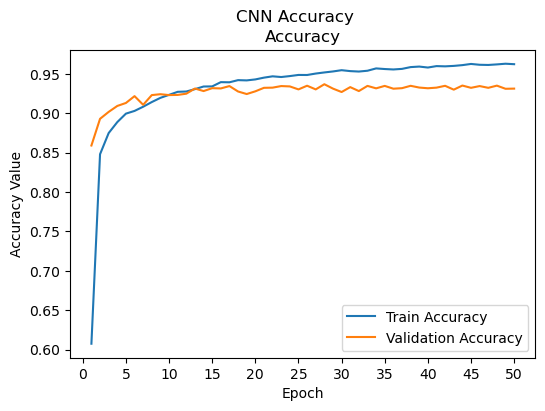

In [18]:
""" 
TODO: CNN Performance checking 
? Checking the performance of the Model through Accuracy and loss values 
? Performance plot shows the effeciency of model
"""
fig, ax1 = plt.subplots(figsize=(6, 4))
t = fig.suptitle('CNN Accuracy', fontsize=12)
epoch_list = list(range(1,51))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 55, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

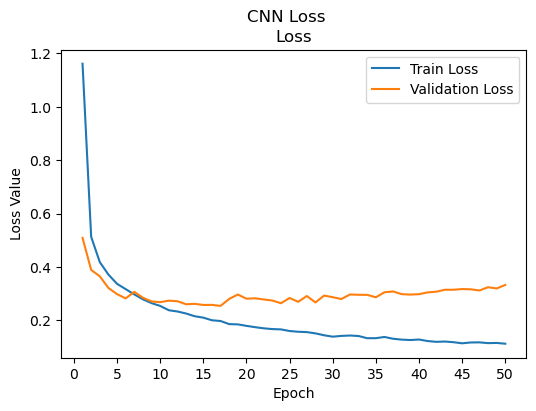

In [19]:
""" 
TODO: CNN Loss checking 
? Checking the Loss of the Model through Accuracy and loss values 
? loss plot shows the how much misses and successes of prediction
"""
fig, ax2 = plt.subplots(figsize=(6, 4))
t = fig.suptitle('CNN Loss', fontsize=12)
epoch_list = list(range(1,51))
ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 55, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [20]:
""" 
TODO: Evaluation of Model
"""
model.evaluate(train_x, train_y)

1313/1313 [==============================] - 22s 17ms/step - loss: 0.0301 - accuracy: 0.9919


[0.0301006231456995, 0.9919047355651855]

In [21]:
""" 
!!! DONT USE THIS CELL
"""
model.save('CNN.h5')


In [22]:
saved_model = load_model('CNN.h5')


In [23]:
saved_model.evaluate(train_x, train_y)

1313/1313 [==============================] - 20s 15ms/step - loss: 0.0301 - accuracy: 0.9919


[0.0301006231456995, 0.9919047355651855]

In [24]:
test_predictions = saved_model.predict(X_test_new)
preds = np.argmax(test_predictions, axis=1)

282/282 [==============================] - 4s 15ms/step


In [25]:
""" 
TODO : final report
? precision: the quality of a positive prediction made by the model.
?            refers to the number of true positives divided by the total number of positive
? recall: is the percentage of data samples that a machine learning model correctly identifies as belonging to a class of interest—the “positive class”—out of the total samples for that class.
? f1-score: a machine learning evaluation metric that measures a model's accuracy
?           It combines the precision and recall scores of a model.
? support: the number of samples of the true response that lies in each class of target values.
"""
print(classification_report(y_test_new, preds))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       890
           1       0.88      0.93      0.90       878
           2       0.97      0.92      0.95       930
           3       0.91      0.91      0.91       864
           4       0.94      0.95      0.95       914
           5       0.93      0.94      0.94       881
           6       0.91      0.93      0.92       914
           7       0.97      0.93      0.95       917
           8       0.92      0.92      0.92       905
           9       0.95      0.92      0.93       907

    accuracy                           0.93      9000
   macro avg       0.93      0.93      0.93      9000
weighted avg       0.93      0.93      0.93      9000



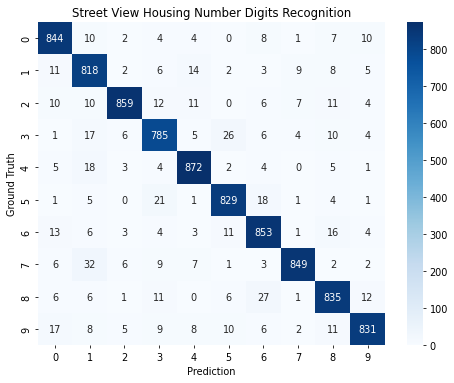

In [26]:
""" 
TODO: Confusion matrix
? step 1 : Defining labels of our samples (number [0:9])
? step 2 : Plotting Confusion Matrix To evaluate the accuracy of the classification
? step 3 : editing themes of confusion matrix
"""
#step 1
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#step 2
cnf = confusion_matrix(y_test_new, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')

# Plotting rectangular data as a color-encoded matrix.
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Street View Housing Number Digits Recognition')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

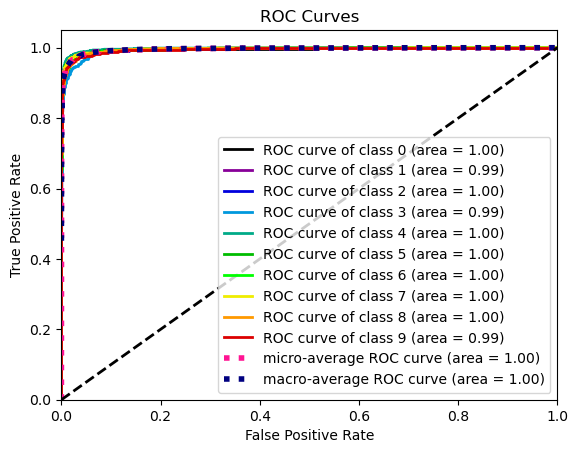

In [27]:
""" 
TODO: plotting ROC curve
? is a graph showing the performance of a classification model at all classification thresholds.
?This curve plots two parameters: True Positive Rate. False Positive Rate.
"""
skplt.metrics.plot_roc(y_test_new, test_predictions)

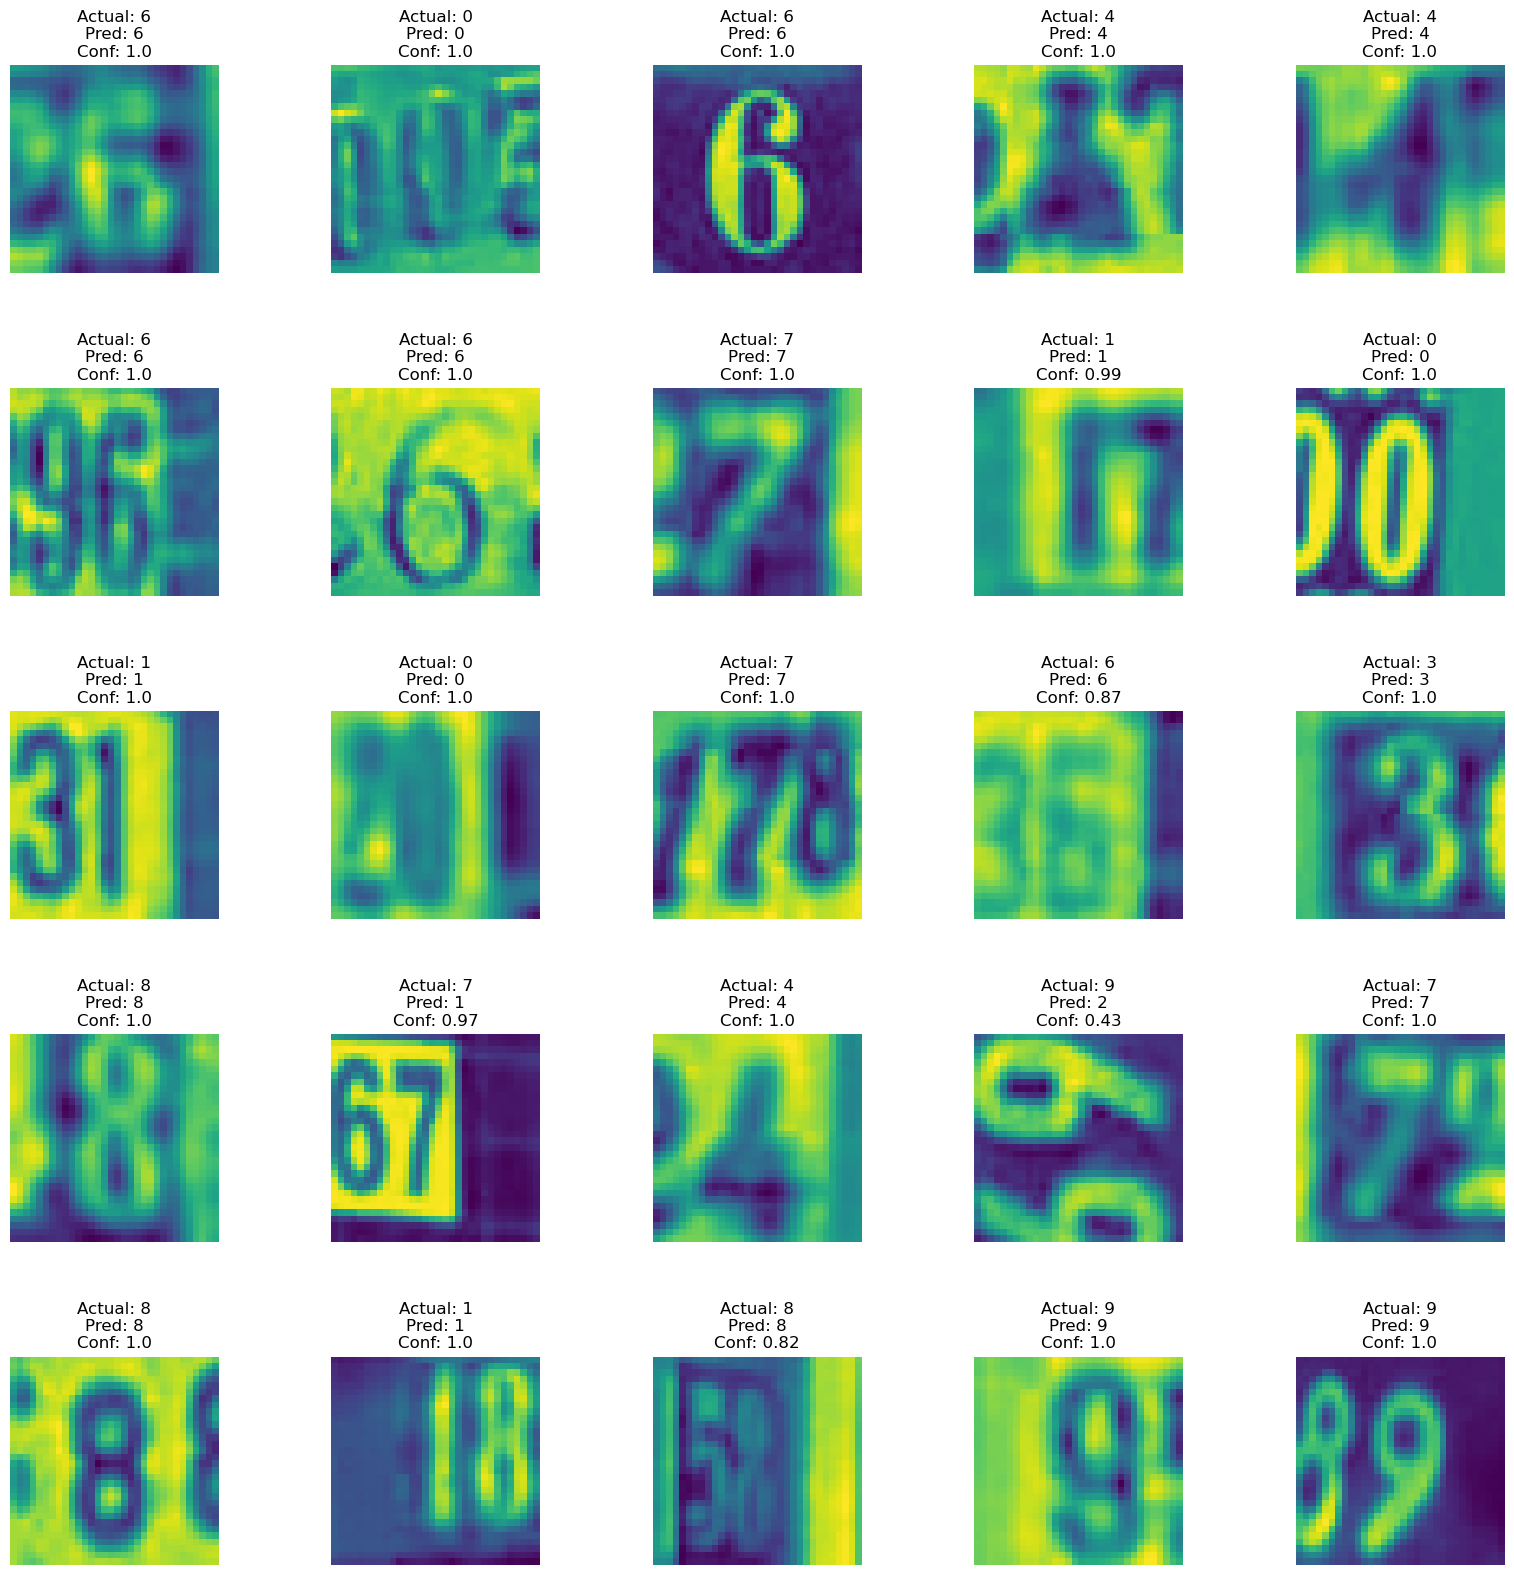

In [29]:
""" 
TODO:  Visualization of Predictions with Confidence

"""
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = y_test_new[img_idx]
        predicted = preds[img_idx]
        confidence = round(test_predictions[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+str(actual)+'\nPred: '+str(labels[predicted])+ '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test_new[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)  